In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
b4=rasterio.open('LC08_L2SP_148047_20210618_20210628_02_T1_SR_B4.TIF')
b5=rasterio.open('LC08_L2SP_148047_20210618_20210628_02_T1_SR_B5.TIF')
b6=rasterio.open("LC08_L2SP_148047_20210618_20210628_02_T1_SR_B6.TIF")

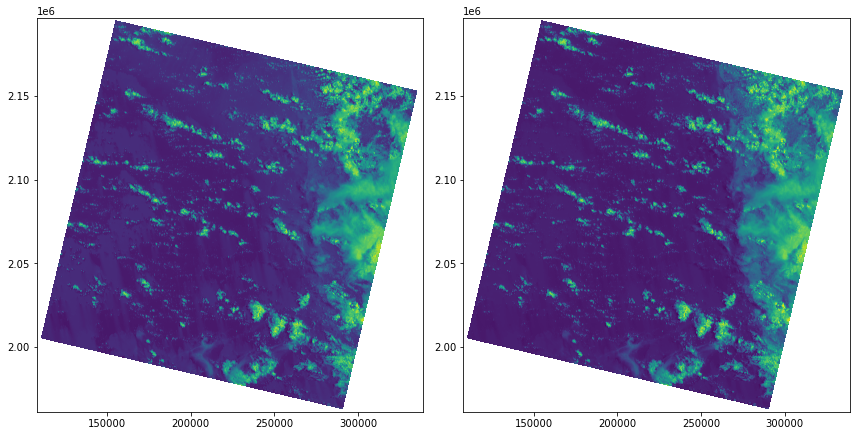

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(b4, ax=ax1, cmap='viridis') #red
plot.show(b5, ax=ax2, cmap='viridis') #nir
fig.tight_layout()

In [4]:
v4=b4.read(1).astype('float64')
v5=b5.read(1).astype('float64')

In [5]:
np.seterr(divide='ignore', invalid='ignore')
ndvi=np.where(
    (v4+v5)==0.,
    0,
    (v5-v4)/(v4+v5)
)

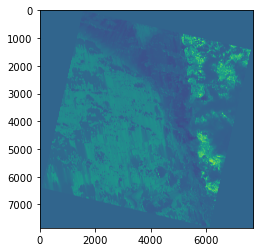

<AxesSubplot:>

In [6]:
plot.show(ndvi)

In [7]:
ndviImage=rasterio.open("Output.TIF","w",driver="Gtiff",width=b4.width,height=b4.height,count=1,crs=b4.crs,transform=b4.transform,dtype="float64")
ndviImage.write(ndvi,1)
ndviImage.close()

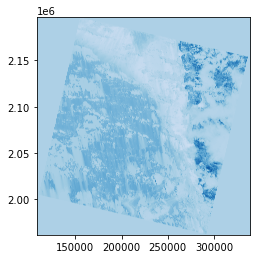

<AxesSubplot:>

In [9]:
ndvi2=rasterio.open("Output.TIF")
plot.show(ndvi2,cmap="Blues")